<a href="https://colab.research.google.com/github/dilrukshax/Deep_Learning/blob/main/MLP_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Imports & setup
import numpy as np
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from matplotlib import pyplot as plt
import random

# Reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)


Load the MNIST dataset

In [28]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

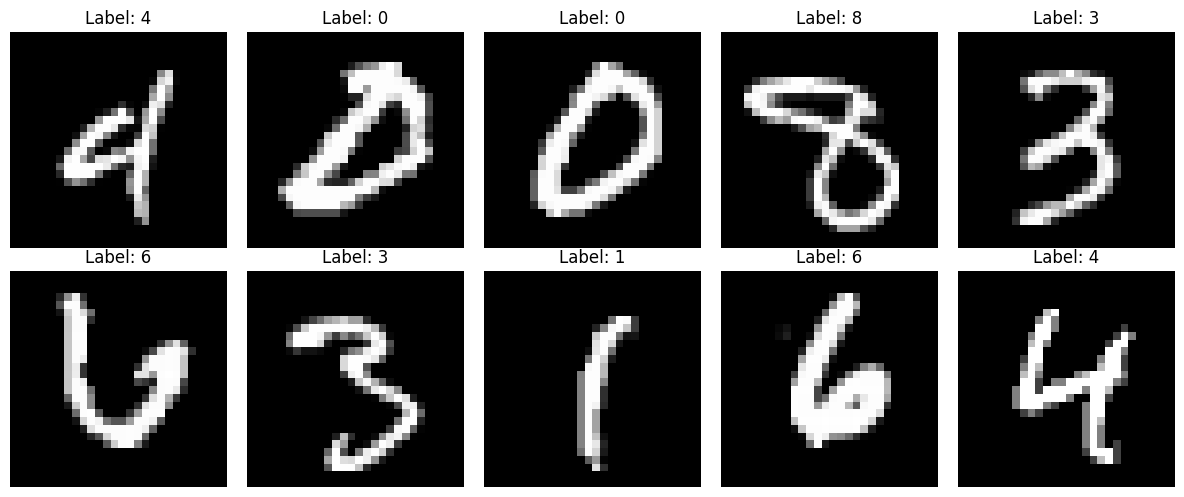

In [29]:
fig, axs = plt.subplots(2, 5, figsize=(12,5))
idxs = np.random.randint(0, train_data.shape[0], 10)
for ax, idx in zip(axs.flatten(), idxs):
    ax.imshow(train_data[idx], cmap='gray')
    ax.set_title(f"Label: {train_target[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


Pre-processing stage

In [30]:
# Normalize to [0,1] and prepare labels
new_train_data = (train_data.astype('float32'))/255.0
new_test_data  = (test_data.astype('float32'))/255.0

# One-hot for training with categorical_crossentropy
new_train_target = to_categorical(train_target, num_classes=10)
new_test_target  = to_categorical(test_target,  num_classes=10)


Create the Model architecture

In [31]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))

# Hidden layers with L1/L2 regularization to reduce overfitting
model.add(Dense(256, activation='relu',
                kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dense(256, activation='relu',
                kernel_regularizer=regularizers.l2(1e-4)))
model.add(Dense(128, activation='relu',
                kernel_regularizer=regularizers.l2(1e-4)))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile with tuned optimizer
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 300,938 (1.15 MB)

 Trainable params: 300,938 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [33]:
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

train_info = model.fit(
    new_train_data, new_train_target,
    epochs=25,
    batch_size=128,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8497 - loss: 0.6436 - val_accuracy: 0.9682 - val_loss: 0.2106 - learning_rate: 0.0010
Epoch 2/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9660 - loss: 0.2227 - val_accuracy: 0.9710 - val_loss: 0.1884 - learning_rate: 0.0010
Epoch 3/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9773 - loss: 0.1762 - val_accuracy: 0.9722 - val_loss: 0.1819 - learning_rate: 0.0010
Epoch 4/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9830 - loss: 0.1510 - val_accuracy: 0.9782 - val_loss: 0.1651 - learning_rate: 0.0010
Epoch 5/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9873 - loss: 0.1344 - val_accuracy: 0.9792 - val_loss: 0.1680 - learning_rate: 0.0010
Epoch 6/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9879 - loss: 0.1278 - val_accuracy: 0.9788 - val_loss: 0.1617 - learning_rate: 0.0010
Epoch 7/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9895 - loss: 0

Plot the loss and accuracy graphs

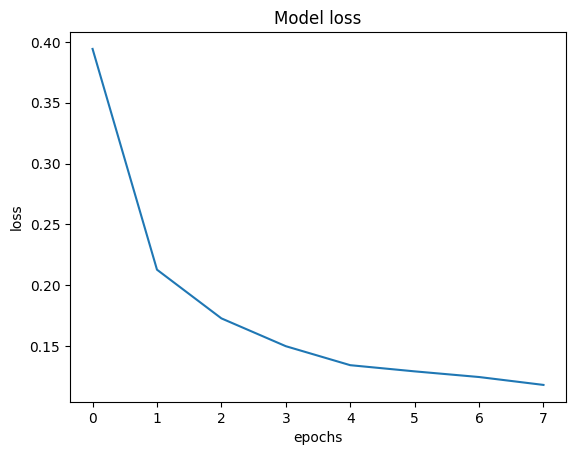

In [34]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()


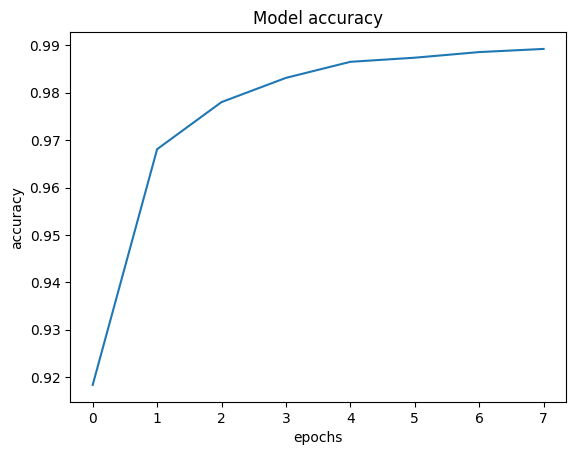

In [35]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()


Test the performance of Model

Loss of the Test dataset is: 0.1762
Accuracy of the test dataset is: 97.4500%


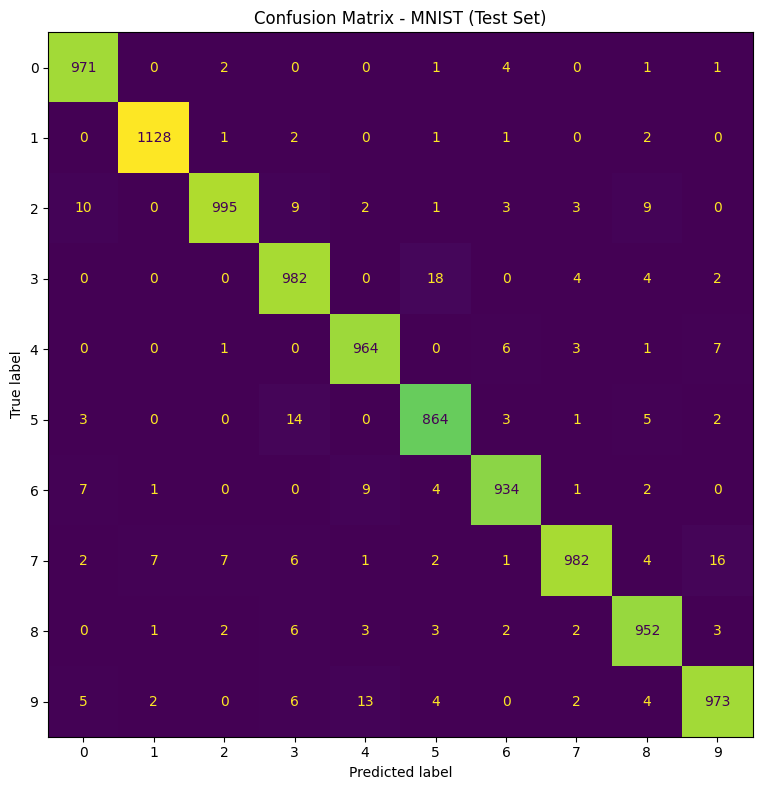

Classification Report:
              precision    recall  f1-score   support

           0     0.9729    0.9908    0.9818       980
           1     0.9903    0.9938    0.9921      1135
           2     0.9871    0.9641    0.9755      1032
           3     0.9580    0.9723    0.9651      1010
           4     0.9718    0.9817    0.9767       982
           5     0.9621    0.9686    0.9654       892
           6     0.9790    0.9749    0.9770       958
           7     0.9840    0.9553    0.9694      1028
           8     0.9675    0.9774    0.9724       974
           9     0.9691    0.9643    0.9667      1009

    accuracy                         0.9745     10000
   macro avg     0.9742    0.9743    0.9742     10000
weighted avg     0.9746    0.9745    0.9745     10000



In [36]:
# Evaluate on the test set
loss, acc = model.evaluate(new_test_data, new_test_target, verbose=0)
print(f'Loss of the Test dataset is: {loss:.4f}\nAccuracy of the test dataset is: {acc:.4%}')

# Predict
y_prob = model.predict(new_test_data, verbose=0)
y_pred = np.argmax(y_prob, axis=1)
y_true = test_target

# Try sklearn for CM; fallback to numpy if unavailable
try:
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
    disp.plot(ax=ax, colorbar=False)
    plt.title('Confusion Matrix - MNIST (Test Set)')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
    print("Classification Report:")
    print(classification_report(y_true, y_pred, digits=4))
except Exception as e:
    # Numpy-based confusion matrix
    num_classes = 10
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[int(t), int(p)] += 1
    fig, ax = plt.subplots(figsize=(8,8))
    im = ax.imshow(cm, interpolation='nearest')
    ax.set_title('Confusion Matrix - MNIST (Test Set)')
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_xticks(range(num_classes)); ax.set_yticks(range(num_classes))
    for i in range(num_classes):
        for j in range(num_classes):
            ax.text(j, i, cm[i, j], ha="center", va="center")
    plt.tight_layout()
    plt.show()
    print("sklearn not available; displayed raw confusion matrix computed with NumPy.")


Save the model weights

In [37]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')